Sample data for verification:
B_Y1: [-12.37  -8.5   -8.5   -8.5   -8.5 ]
B_Y2: [-2.63 -2.63 -2.63 -2.63 -9.84]
B_Y3: [-12.05 -12.05 -12.05  -7.03  -7.03]
B_Y4: [-10.63  -4.66  -4.66  -4.66  -3.53]


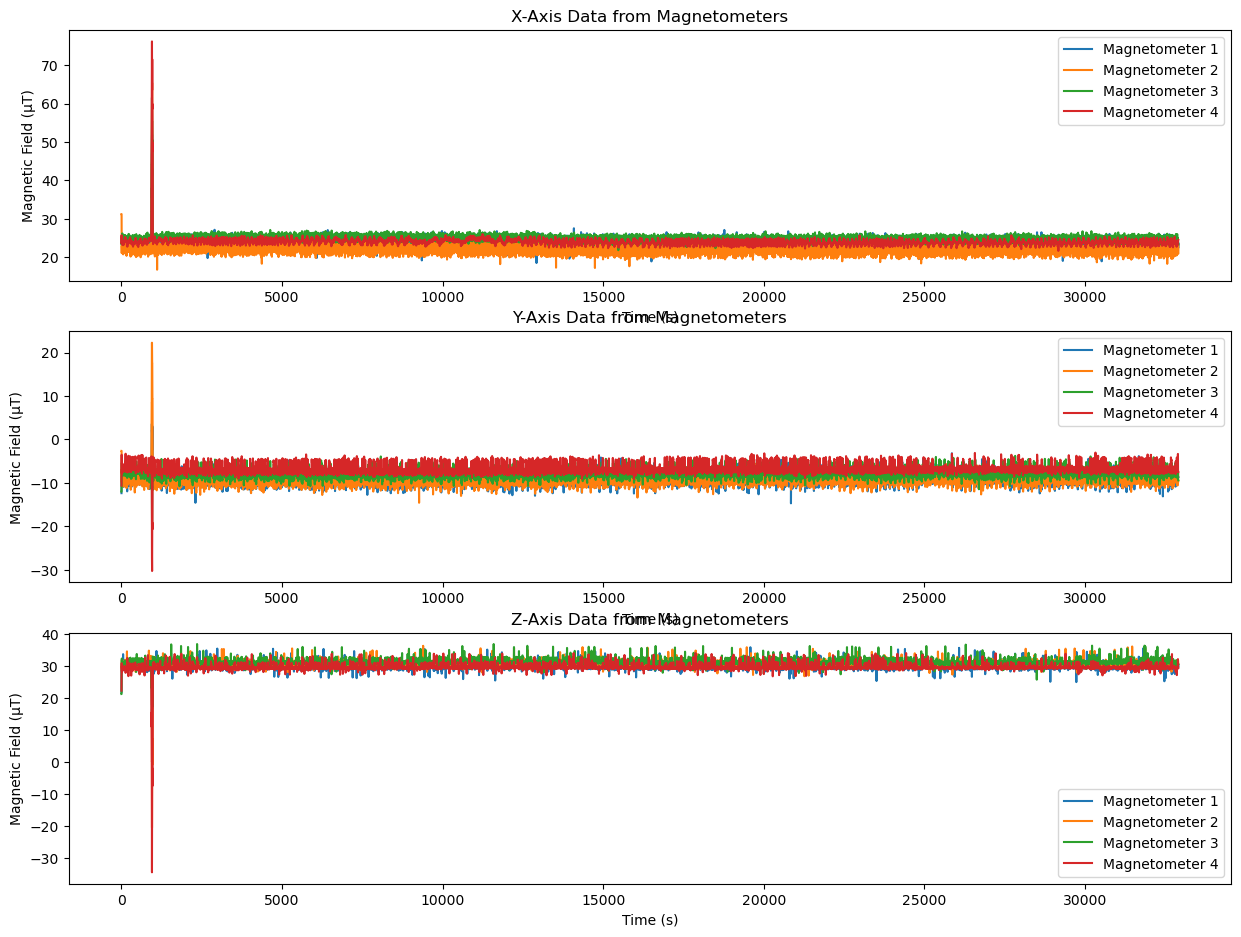

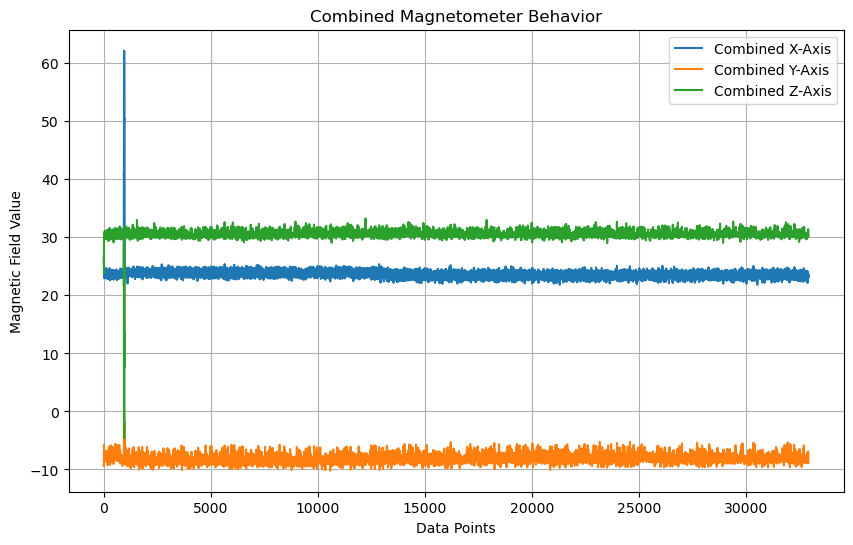

C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



[[ 1.  +0.j    0.12+0.j    0.25+0.j    0.97+0.j    0.22+0.j    0.21+0.j
   0.54+0.j    0.22+0.j    0.16+0.j  ]
 [ 1.  +0.j    0.11+0.09j  0.16+0.06j  0.19+0.06j -0.96+0.06j  0.12+0.05j
  -0.83+0.1j   0.91+0.34j  0.93+0.31j]
 [ 1.  +0.j   -0.96+0.19j -0.95-0.04j -0.06-0.j   -0.12+0.03j  0.91+0.31j
   0.06+0.08j -0.07-0.02j  0.06+0.04j]
 [ 1.  +0.j   -0.1 +0.06j  0.09+0.03j  0.02+0.02j -0.05-0.j    0.04+0.06j
   0.01+0.05j  0.02+0.03j -0.03+0.03j]]


100%|███████████████████████████████████████████████████████████████████████████| 35033/35033 [02:14<00:00, 260.37it/s]
C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



[[ 1.  +0.j    0.64+0.j    0.61+0.j    0.67+0.j    0.69+0.j    0.39+0.j
   0.55+0.j    0.64+0.j  ]
 [ 1.  +0.j   -0.55-0.08j  0.66+0.18j  0.64+0.03j  0.38+0.06j  0.54+0.18j
  -0.43-0.1j  -0.42+0.j  ]
 [ 1.  +0.j   -0.39+0.02j -0.28+0.02j  0.17+0.08j -0.5 +0.05j  0.43+0.18j
   0.61+0.17j  0.58+0.15j]
 [ 1.  +0.j   -0.34+0.04j -0.29+0.j   -0.32+0.04j  0.35+0.06j  0.53+0.16j
   0.31+0.12j -0.22+0.03j]]


100%|███████████████████████████████████████████████████████████████████████████| 35033/35033 [02:12<00:00, 264.75it/s]
C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



[[ 1.  +0.j    0.2 +0.j    0.51+0.j    0.25+0.j    0.55+0.j  ]
 [ 1.  +0.j   -0.33+0.26j  0.46+0.17j  0.52+0.11j -0.5 +0.03j]
 [ 1.  +0.j   -0.54+0.59j -0.3 +0.09j  0.26+0.05j  0.49+0.12j]
 [ 1.  +0.j   -0.19+0.32j  0.62+0.13j  0.76+0.13j  0.44+0.07j]]


100%|███████████████████████████████████████████████████████████████████████████| 35033/35033 [02:02<00:00, 285.47it/s]


B_ubss shape: (3, 32913)


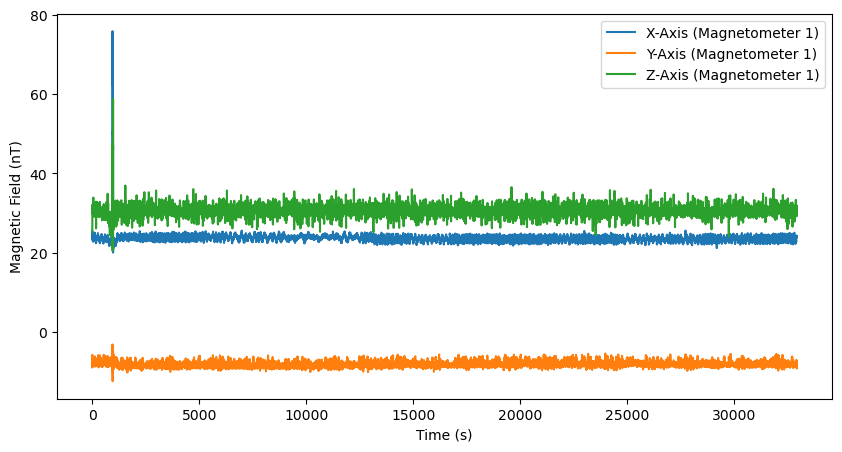

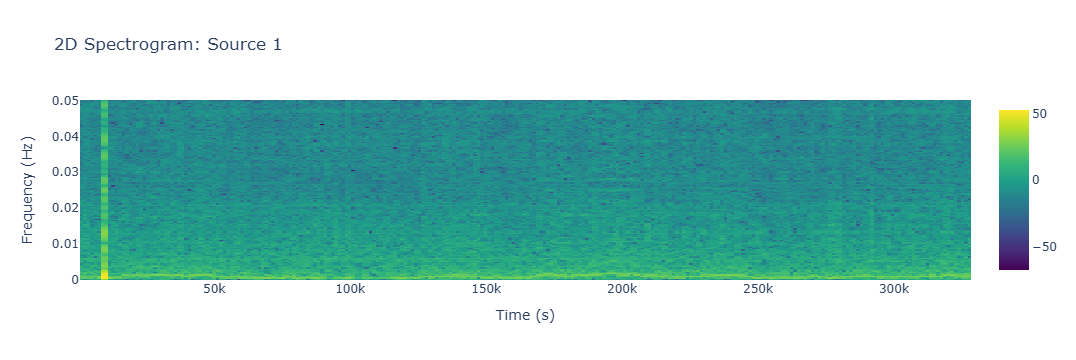

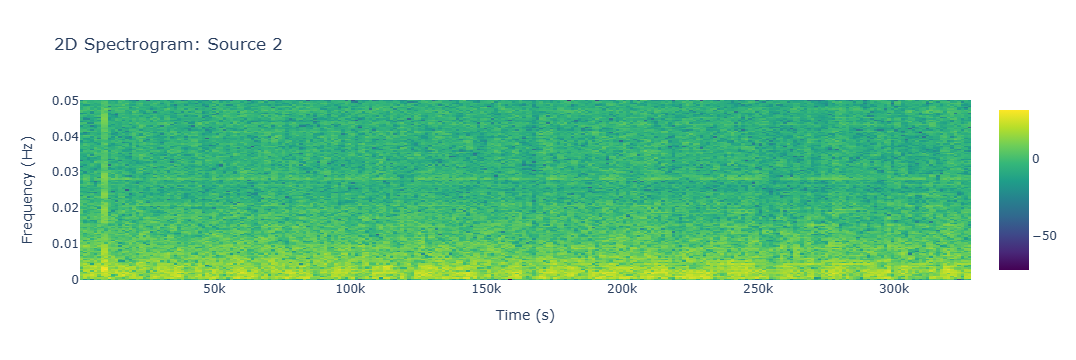

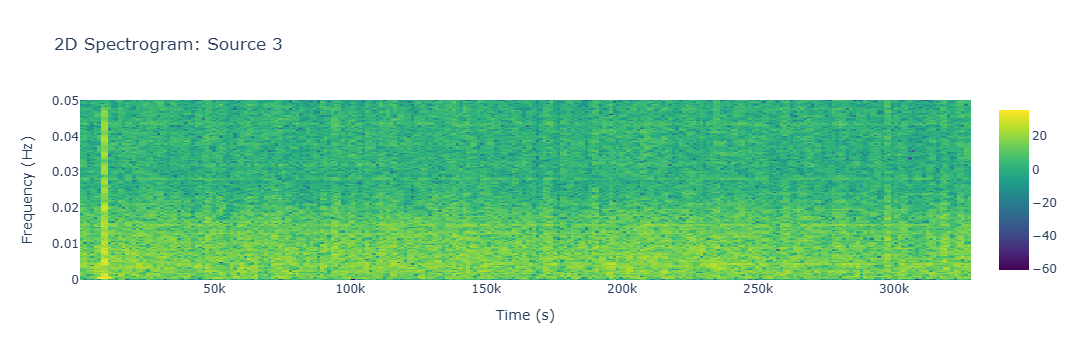

IndexError: index 3 is out of bounds for axis 0 with size 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import plotly.graph_objects as go
import sys
sys.path.append(r'C:\Users\ASUS\Desktop\ubss\MAGPRIME')
from magprime.algorithms import UBSS
from magprime.algorithms import NESS
from magprime.utility import calculate_coupling_coefficients



# Function to load data from the .dat file
def load_data(file_path):
    try:
        # Use np.genfromtxt to handle non-numeric entries
        data = np.genfromtxt(file_path, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), 
                             invalid_raise=False, filling_values=0)
    except Exception as e:
        print(f"Error loading data: {e}")
        data = np.array([])  # Return an empty array in case of an error
    return data

# Path to the data file
file_path = r"C:\Users\ASUS\Desktop\ubss\FM_BOARD_DATA1.5_HOUR.txt"

# Load data
B = load_data(file_path)
if B.size == 0:
    raise ValueError("Failed to load data or data is empty")

# Check for rows with all zeros (likely due to invalid entries)
if not B.any(axis=1).all():
    print("Warning: Some rows contain only zeros due to invalid entries.")

Ba = B.T  # Transpose to separate columns

# Separate into individual arrays for each magnetometer's X, Y, Z components
B_X1, B_Y1, B_Z1 = Ba[0], Ba[1], Ba[2]
B_X2, B_Y2, B_Z2 = Ba[3], Ba[4], Ba[5]
B_X3, B_Y3, B_Z3 = Ba[6], Ba[7], Ba[8]
B_X4, B_Y4, B_Z4 = Ba[9], Ba[10], Ba[11]

# Print sample data to verify values
print("Sample data for verification:")
print("B_Y1:", B_Y1[:5])
print("B_Y2:", B_Y2[:5])
print("B_Y3:", B_Y3[:5])
print("B_Y4:", B_Y4[:5])

# Stack the data into 2D arrays for each magnetometer (3 x n for each)
B1 = np.vstack((B_X1, B_Y1, B_Z1))
B2 = np.vstack((B_X2, B_Y2, B_Z2))
B3 = np.vstack((B_X3, B_Y3, B_Z3))
B4 = np.vstack((B_X4, B_Y4, B_Z4))

# Stack all magnetometer data into a 3D array: (magnetometers, axes, data points)
B_ma = np.stack((B1, B2, B3, B4), axis=0)



# Plot the data for each axis of the four magnetometers
plt.figure(figsize=(15, 15))

# Plot X-Axis Data from Magnetometers
plt.subplot(4, 1, 1)
plt.title("X-Axis Data from Magnetometers")
plt.plot(B_X1, label="Magnetometer 1")
plt.plot(B_X2, label="Magnetometer 2")
plt.plot(B_X3, label="Magnetometer 3")
plt.plot(B_X4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()

# Plot Y-Axis Data from Magnetometers
plt.subplot(4, 1, 2)
plt.title("Y-Axis Data from Magnetometers")
plt.plot(B_Y1, label="Magnetometer 1")
plt.plot(B_Y2, label="Magnetometer 2")
plt.plot(B_Y3, label="Magnetometer 3")
plt.plot(B_Y4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()

# Plot Z-Axis Data from Magnetometers
plt.subplot(4, 1, 3)
plt.title("Z-Axis Data from Magnetometers")
plt.plot(B_Z1, label="Magnetometer 1")
plt.plot(B_Z2, label="Magnetometer 2")
plt.plot(B_Z3, label="Magnetometer 3")
plt.plot(B_Z4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()
# Combine the data for each axis
X_combined = np.mean(B_ma[:, 0, :], axis=0)  # Combine all X-axis data
Y_combined = np.mean(B_ma[:, 1, :], axis=0)  # Combine all Y-axis data
Z_combined = np.mean(B_ma[:, 2, :], axis=0)  # Combine all Z-axis data

# Plot the combined behavior
plt.figure(figsize=(10, 6))
plt.plot(X_combined, label="Combined X-Axis")
plt.plot(Y_combined, label="Combined Y-Axis")
plt.plot(Z_combined, label="Combined Z-Axis")
plt.title("Combined Magnetometer Behavior")
plt.xlabel("Data Points")
plt.ylabel("Magnetic Field Value")
plt.legend()
plt.grid()
plt.show()

# Configure UBSS parameters
UBSS.detrend = True
UBSS.sigma = 10
UBSS.fs = 0.1
UBSS.cs_iters = 2
UBSS.bpo = 5

# Clean the data using UBSS
B_ubss = UBSS.clean(np.copy(B_ma), triaxial=True)

# Check the shape of B_ubss to understand its structure
print(f"B_ubss shape: {B_ubss.shape}")

# Plot the data assuming B_ubss is a 2D array (magnetometer x time)
plt.figure(figsize=(10, 5))
plt.plot(B_ubss[0, :], label="X-Axis (Magnetometer 1)")
plt.plot(B_ubss[1, :], label="Y-Axis (Magnetometer 1)")
plt.plot(B_ubss[2, :], label="Z-Axis (Magnetometer 1)")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (nT)")
plt.legend()
plt.show()

def plot_2d_spectrogram(data, fs, axes_labels):
    for i, label in enumerate(axes_labels):
        # Compute the spectrogram
        f, t, Sxx = signal.spectrogram(data[i], fs=fs, nperseg=256, noverlap=128)
        
        # Create a 2D heatmap
        fig = go.Figure(data=go.Heatmap(
            z=10 * np.log10(Sxx),  # Convert power to dB
            x=t,  # Time axis
            y=f,  # Frequency axis
            colorscale='Viridis'
        ))
        
        # Update the layout
        fig.update_layout(
            title=f"2D Spectrogram: {label}",
            xaxis_title="Time (s)",
            yaxis_title="Frequency (Hz)"
        )
        
        # Show the plot
        fig.show()

# Call the function with UBSS-cleaned data
plot_2d_spectrogram(B_ubss, fs=0.1, axes_labels=["Source 1", "Source 2", "Source 3", "Source 4"])
